## Polynomer

Vi møter polynomer i matte og fysikk innenfor mange anvendelsesområder. På papiret jobber vi symbolsk (med selve polynomet, ligningen) før vi setter inn verdier. Men mange av de tingene vi ønsker å gjøre med poynomer kan løses nummerisk. ```numPy``` har egne bibliotek for å gjøre dette.

Utgangspunktet for dette, som gjør ting relativt enkelt, er at et polynom av n'te grad kan representeres ved en 1d-array som inneholder koeffisientene inklusive konstantleddet.  

For eksempel vil $\ P_4 = \begin{bmatrix} 24 & -14 & -13 & 2 & 1 \end{bmatrix} \ $  
tilsvare  $ 24 - 14x - 13x^2 + 2x^3 + x^4 $  

Arrayen må alltid ha ett element mer enn graden til polynomet.  
> Står det ingen koeffisient foran leddet må det stå ***1*** i arrayen.  
Mangler leddet må det stå ***0*** i arrayen.  
Er polynomet oppgitt med største potens først og konstantledd til slutt må vi snu polynomet først.

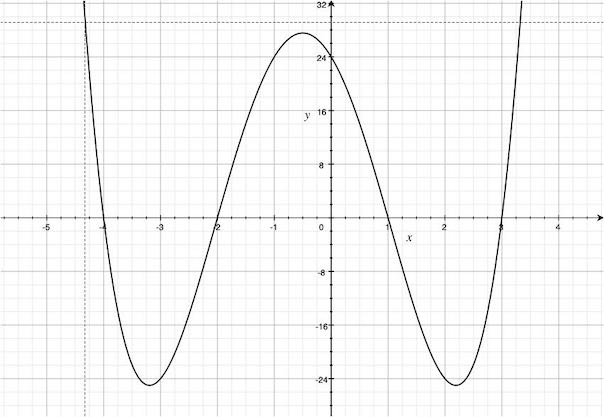

```numpy.polynomials``` har en rekke operasjoner (funksjoner) for polynomer.  
Vi blir for det meste å bruke det som ligger i undermodulen ```numpy.polynomial.polynomial```.  
For å slippe å skrive det for hver gang vi skal bruke noe derfra importerer vi den som ```poly```.  
Fra hovedmodulen ```numpy``` trenger vi bare muligheten for å opprette en array, altså ```numpy.array```

### Røtter og polynomverdi

De to kanskje mest fundamentale tingene vi kan gjøre med et polynom er å finne ***røttene***/nullpunktene (y=0) og regne ut ***polynomverdier*** (y-verdier) for ulike x.

Vi begynner med å finne røttene til polynomet som er vist over.  
Først setter vi opp en array med konstantene til polynomet.  
Deretter bruker vi funksjonen ```polyroots()```. Den gir røttene direkte.

In [1]:
from numpy import array
import numpy.polynomial.polynomial as poly

P4 = array([24, -14, -13, 2, 1])  # Setter opp array med koeffisienter
Rp4 = poly.polyroots(P4)          # Regner ut røttene til polynomet
print(Rp4)

[-4. -2.  1.  3.]


Som resultat får vi en array med nullpunktene (røttene) til polynomet.  

I en del tilfeller vet vi hva nullpunktene skal være og vil finne polynomet som passer. Da kan vi gå andre veien og finne konstantene med ```polyfromroots()```.  
Vi bruker resultet fra forrige operasjon.

In [2]:
Pol = poly.polyfromroots(Rp4)
print(Pol)

[ 24. -14. -13.   2.   1.]


Siden vi bruker svaret fra forrige operasjon som argument får vi det opprinnelige polynomet som svar, som forventet.  

Arrayen med konstantene kan vi også bruke til å regne ut polynomverdier (y-verdier) for bestemte x-verdier. Her er det ```numpy.polyval()``` som brukes.

In [3]:
poly.polyval(-2, P4)

0.0

Ved å bruke en array med x-verider får vi regnet ut like mange y-verdier på en gang.

In [5]:
Xer = array([-2.5, -2, -1., -0.5, 0])
poly.polyval(Xer, P4)

array([-14.4375,   0.    ,  24.    ,  27.5625,  24.    ])

Med et tilstrekkelig stort antall x-verdier med liten nok avstand kan vi bruke dette til å plotte kurven.

Har vi røttene og ikke polynomet (koeffisientene) kan vi bruke disse direkte for å regne ut polynomerdier med ```polyvalfromroots()```.

In [6]:
poly.polyvalfromroots(Xer, Rp4)

array([-1.44375000e+01,  2.66453526e-14,  2.40000000e+01,  2.75625000e+01,
        2.40000000e+01])

Ved første øyekast kan de se ut som vi fikk et helt annet svar. Men hvis vi analyserer resulatet ser vi at den andre verdien er tilnærmet lik null. Avviket skyldes en avrundingsfeil. Noe som man må være obs på når man jobber nummerisk. Dette har ført til at alle verdiene vises som tierpotenser. Resultatet er egentlig de samme som vi fikk med ```polyval()```.

### Polynomobjekt og pen utskrift

Vi har også muligheten til å opprette et polynomobjekt. For å kunne gjøre det må klassen ```Polynomial``` importeres. Vi skal ikke bruke det til noe annet enn at hvis vi setter det i en printsetning så får vi pen utskrift av polynomet.

In [11]:
from numpy.polynomial import Polynomial
p = Polynomial(P4)
print(p)

24.0 - 14.0·x¹ - 13.0·x² + 2.0·x³ + 1.0·x⁴


### Aritmetiske operasjoner

Undermodulen vi har importert har også funksjoner for å gjøre aritmetiske operasjoner med polynomer.  
Alle untatt polydiv()  returnerer en array med koeffisienter som svar. De fire første av disse tar to array med koeffisienter som argument.  
```polyadd()``` Legger sammen to polynomer.  Den legger sammen koeffisientene av samme orden.  
```polysub()``` Trekker et polynom fra et annet. Den trekker koeffisientene i det andre polynomet fra det første.  
```polymul()``` Multipliserer to polynomer.  
```polydiv()``` Polynomdivisjon. Returnerer to array som representerer henholdsvis **kvotient** og **rest**.  
 

I tillegg har vi ```polymulx()``` Multipliserer et polynom med x der x er den uavhengige variabelen. Den tar en array med koeffisienter som argument.

In [27]:
P1 = array([4, -3, 2])
Po1 = Polynomial(P1)
P2 = array([-3, -2, 1])
Po2 = Polynomial(P2)
P3 = array([1, 2])
Po3 = Polynomial(P3)
print('polynom P1: ', Po1)
print('polynom P2: ', Po2)
print('polynom P3: ', Po3)

Pa = Polynomial(poly.polyadd(P1, P2))
print('Summen av P1 og P2 er ', Pa)

Ps = Polynomial(poly.polysub(P1, P2))
print('P1 - P2 er ', Ps)

Pm = Polynomial(poly.polymul(P1, P2))
print('P1 multiplisert med P2 er ', Pm)

kvot, rest = poly.polydiv(P1, P3)
Pkvot = Polynomial(kvot)
Prest = Polynomial(rest)
print('P1 delt på P2 gir ', Pkvot, ' som kvotient og ', Prest, ' som rest')

Pmx = Polynomial(poly.polymulx(P1))
print('P1 multiplisert med x er ', Pmx)

polynom P1:  4.0 - 3.0·x¹ + 2.0·x²
polynom P2:  -3.0 - 2.0·x¹ + 1.0·x²
polynom P3:  1.0 + 2.0·x¹
Summen av P1 og P2 er  1.0 - 5.0·x¹ + 3.0·x²
P1 - P2 er  7.0 - 1.0·x¹ + 1.0·x²
P1 multiplisert med P2 er  -12.0 + 1.0·x¹ + 4.0·x² - 7.0·x³ + 2.0·x⁴
P1 delt på P2 gir  -2.0 + 1.0·x¹  som kvotient og  6.0  som rest
P1 multiplisert med x er  0.0 + 4.0·x¹ - 3.0·x² + 2.0·x³


### Kurvetilpassning

numpy har funksjoner for kurvetilpassning med polynomer ved bruk av minste kvadraters metode. Men man må være oppmerksom på at det ikke er sikkert at et polynom vil gi tilfredsstillende resultat med de punktene man har. Alternativer kan være sinusfunksjoner eller splines.  

Videre er det ikke gitt hvilken grad polynom som gir best resultat. Her må man prøve seg fram.